In [1]:
import re
import os
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
class JsonToCsv:
    def __init__(self, json_file, csv_file):
        """
        Initializes the JsonToCsv object with JSON and CSV file paths.
        """
        self.json_file = json_file
        self.csv_file = csv_file

    def get_all_from_key(self, data, key_name):
        """
        Extracts all data corresponding to a key from nested lists in a dictionary,
        encloses each entry in square brackets and then joins them using a comma.
        """
        results = []
        if key_name in data:
            results.append(f"[{data[key_name]}]")
        if "posts" in data:
            for post in data["posts"]:
                if key_name in post:
                    results.append(f"[{post[key_name]}]")
                if "photos" in post and key_name == "ocr_text":
                    for photo in post["photos"]:
                        if key_name in photo:
                            results.append(f"[{photo[key_name]}]")
        return ", ".join(results)

    def convert_to_csv(self):
        """
        Reads data from the JSON file, processes it, and writes it to a CSV file.
        """
        with open(self.json_file, "r") as file:
            data = json.load(file)

        rows = []
        for case in data:
            row = {
                "case_id": case.get("id", ""),
                "case_code": case.get("case_code", ""),
                "case_status": case.get("case_status", ""),
                "counts_photos": sum(len(post.get("photos", [])) for post in case.get("posts", [])),
                "counts_enhanced_photos": sum(len(photo.get("enhanced_faces", [])) for post in case.get("posts", []) for photo in post.get("photos", [])),
                "counts_posts": len(case.get("posts", [])),
                "post_ids": ", ".join(post.get("id", "") for post in case.get("posts", [])),
                "post_text": self.get_all_from_key(case, "post_text"),
                "ocr_text": self.get_all_from_key(case, "ocr_text")
            }
            rows.append(row)

        with open(self.csv_file, "w", newline='') as csvfile:
            fieldnames = ["case_id", "case_code", "case_status", "counts_photos", "counts_enhanced_photos", "counts_posts", "post_ids", "post_text", "ocr_text"]
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for row in rows:
                writer.writerow(row)
        
        print("CSV creation completed!")

# Example usage
converter = JsonToCsv("response_1699422658272.json", "json_to_csv.csv")
converter.convert_to_csv()


CSV creation completed!


### Explanation of Input and Output Variables

- **Input Variables**:
  - `json_file`: Path to the JSON file containing the data to be processed.
  - `csv_file`: Path to the CSV file where the processed data will be saved.

### Class Methods

- `__init__`: Initializes the class with paths to the JSON and CSV files.
- `get_all_from_key`: Extracts and formats data corresponding to a specified key from nested JSON data.
- `convert_to_csv`: Processes the JSON data and writes it to a CSV file, using the `get_all_from_key` method for data extraction.

In [3]:
df1 = pd.read_csv('json_to_csv.csv')
df1.head()

,case_id,case_code,case_status,counts_photos,counts_enhanced_photos,counts_posts,post_ids,post_text,ocr_text
0,003e1cfe-434f-4bc8-9cc0-61dddf22abad,23040412,Missing,1,1,1,8b9cf138-5602-436a-b784-5c60af8a4f5e,[خالد مصطفي حسن عرفان \nعمره الان حوالي 12 سنه...,"[May be an image of child, smiling and pie]"
1,0175541d-aff4-4b26-8095-24c1caca449c,2305019,Reunited,1,1,1,8d318381-f68e-43bc-a298-19186be7828d,[تحديث: الحمد لله علي رجع لاهله حمد الله علي ا...,"[May be a selfie of 1 person, beard, smiling a..."
2,01b2c56d-878f-49f9-b338-e6dae8ebe357,23051710,John Doe,1,2,1,1925f483-e4d6-459a-9ac7-26621290b4da,[الراجل دا بيتسول بالطفل في منطقه المهندسين جا...,"[May be an image of 2 people, people smiling a..."
3,023e7ae8-d5f2-4091-914c-008bc4b6e6d5,2304091,Reunited,2,4,2,"2ee3152a-450a-4ea9-a160-2665c6bf3dc0, 4f08d88a...",[تحديث : الحمد لله السيد رجع لاهله بالسلامه\n-...,"[May be an image of one or more people], [May ..."
4,02546fc1-80df-4e9c-81d4-a72509734a23,2304078,John Doe,1,2,1,8e834d44-872e-4e57-88ca-c3d4594e99a8,[هذا الرجل موجود بتاريخ 6 ابريل 2023 في ابو شل...,"[May be an image of ‎one or more people, beard..."


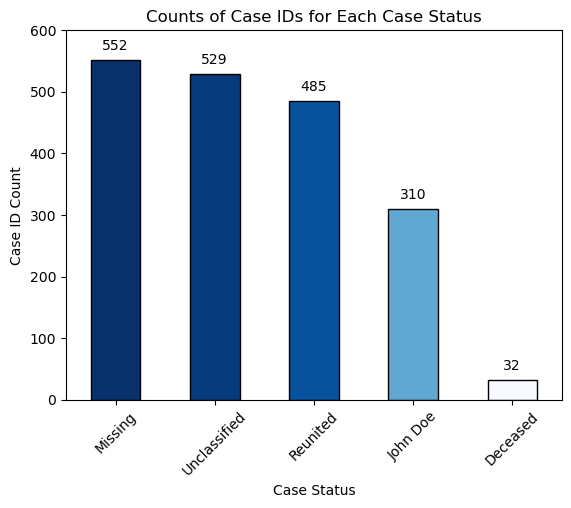

In [32]:
# Grouping by case_status and counting unique case IDs
case_status_unique_counts = df1.groupby('case_status')['case_id'].nunique()

# Sorting the counts for better visualization
case_status_unique_counts = case_status_unique_counts.sort_values(ascending=False)

# Generating gradient colors based on counts
norm = plt.Normalize(case_status_unique_counts.min(), case_status_unique_counts.max())
colors = plt.cm.Blues(norm(case_status_unique_counts.values))

# Plotting
ax = case_status_unique_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Counts of Case IDs for Each Case Status')
plt.xlabel('Case Status')
plt.ylabel('Case ID Count')
plt.xticks(rotation=45)

# Adding the counts above the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# plt.tight_layout()
plt.ylim((0,600))

# Display the plot
plt.show()



The bar graph depicts the distribution of unique case IDs across various case statuses. The counts of "Missing" and "Unclassified" are high, with "Reunited" following closely. There's a significant drop in frequency for "John Doe" cases, and "Deceased". The bars are color-coded with darker shades indicating higher frequencies, and each bar is labeled with the exact count of cases for transparency.

Cases with age Missing: 503
Cases without age Missing: 49
Cases with age John Doe: 25
Cases without age John Doe: 285
Cases with age Unclassified: 386
Cases without age Unclassified: 143


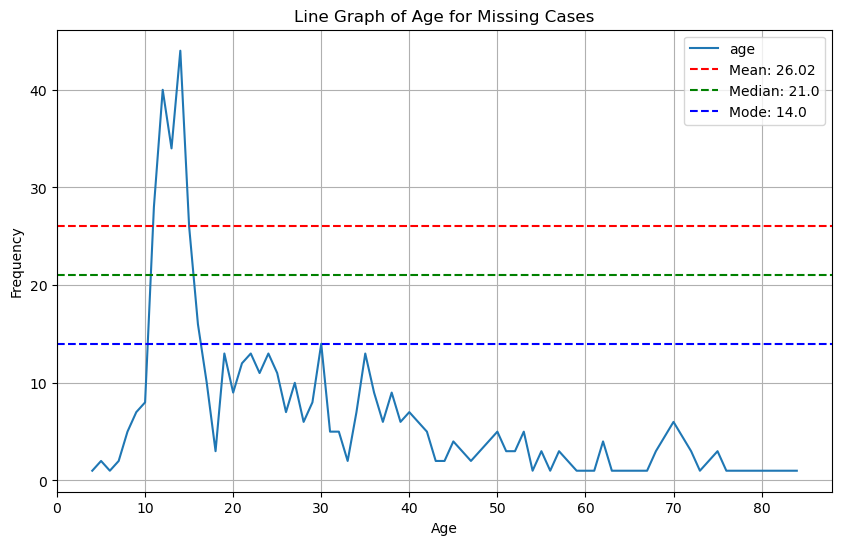

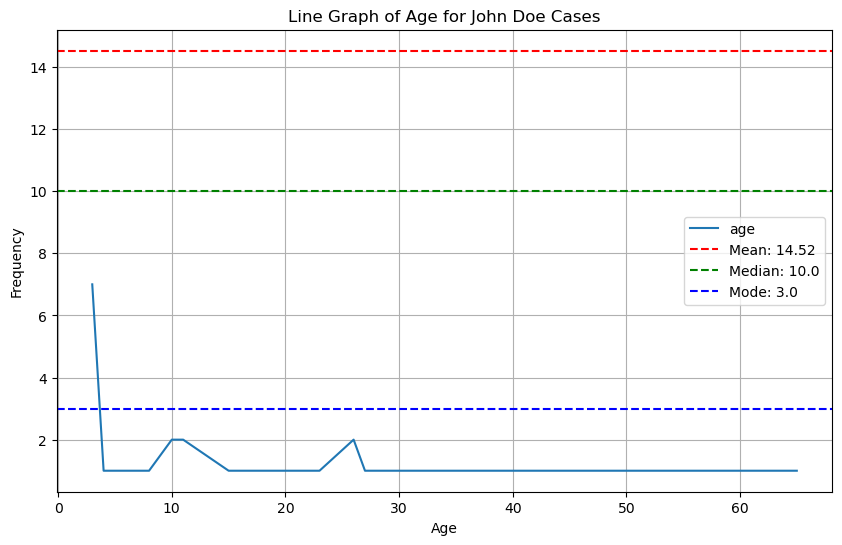

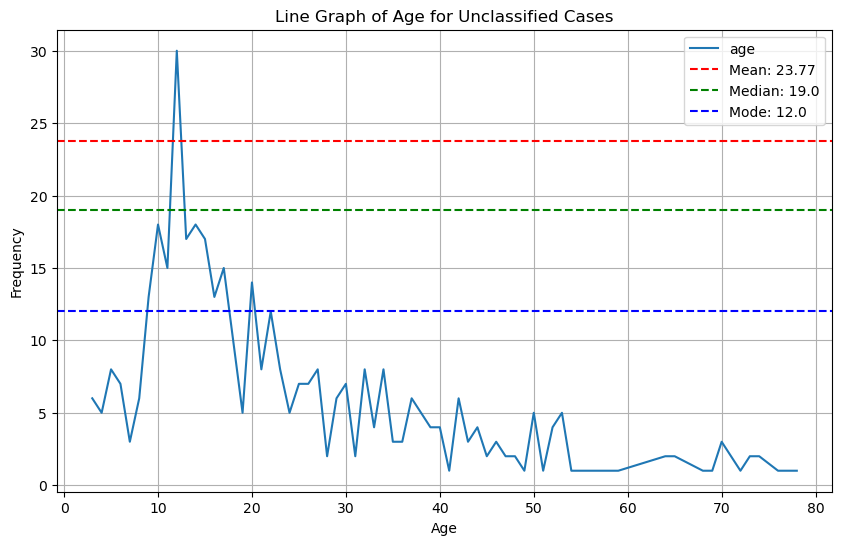

In [6]:
# Load the data
df = pd.read_csv('json_to_csv.csv')

# Clean up the post_text column
df['post_text'] = df['post_text'].str.replace(r'\[|\]', '', regex=True)

# Define a function to extract age from the Arabic text
def extract_age(text):
    # Search for age using regular expressions
    age_match = re.search(r'(\d{1,2})\s*سن', text)  # Arabic for 'year' is 'سن'
    if age_match:
        return int(age_match.group(1))  # Convert the extracted age to integer
    return None

# Apply the function to extract age
df['age'] = df['post_text'].apply(extract_age)

# Initialize counters for each case status
age_found_counts = {'Missing': 0, 'John Doe': 0, 'Unclassified': 0}
age_not_found_counts = {'Missing': 0, 'John Doe': 0, 'Unclassified': 0}

# Filter for specific case statuses and separate them
df_missing = df[df['case_status'] == 'Missing']
df_john_doe = df[df['case_status'] == 'John Doe']
df_unclassified = df[df['case_status'] == 'Unclassified']

# Update the counts for cases with and without age
for status, df_status in [('Missing', df_missing), ('John Doe', df_john_doe), ('Unclassified', df_unclassified)]:
    age_found_counts[status] = df_status['age'].notna().sum()
    age_not_found_counts[status] = df_status['age'].isna().sum()

# Print counts for each case status
for status in ['Missing', 'John Doe', 'Unclassified']:
    print(f"Cases with age {status}: {age_found_counts[status]}")
    print(f"Cases without age {status}: {age_not_found_counts[status]}")

# Function to plot line graph for age values of cases
def plot_age_line_graph(filtered_df, case_status):
    age_values = filtered_df.dropna(subset=['age'])['age']
    mean_age = age_values.mean()
    median_age = age_values.median()
    mode_age = age_values.mode()[0] if not age_values.mode().empty else None

    plt.figure(figsize=(10, 6))
    age_values.value_counts().sort_index().plot(kind='line')

    if mean_age: plt.axhline(y=mean_age, color='r', linestyle='--', label=f'Mean: {mean_age:.2f}')
    if median_age: plt.axhline(y=median_age, color='g', linestyle='--', label=f'Median: {median_age}')
    if mode_age: plt.axhline(y=mode_age, color='b', linestyle='--', label=f'Mode: {mode_age}')

    plt.legend()
    plt.title(f'Line Graph of Age for {case_status} Cases')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotting separate line graphs for each case status
plot_age_line_graph(df_missing, 'Missing')
plot_age_line_graph(df_john_doe, 'John Doe')
plot_age_line_graph(df_unclassified, 'Unclassified')



The above code is designed to extract age information from text, create age distribution graphs for each of three case statuses ('Missing', 'John Doe', 'Unclassified'), and print the number of cases with and without age information for each status.

The output from the code includes:

1. **Textual Output**:
   - The number of cases with age information found for each case status.
   - The number of cases without age information for each case status.

For example:
   - 503 cases with age information for 'Missing' status.
   - 49 cases without age information for 'Missing' status.
   - And similarly for 'John Doe' and 'Unclassified'.

2. **Graphical Output**:
   - For each of the case statuses, a separate line graph is generated showing the age distribution of the cases.
   - Each graph plots the frequency of each age on the y-axis against the age on the x-axis.
   - Horizontal lines are added to each graph to indicate the mean, median, and mode age for that case status.
   - The mean age is represented by a red dashed line, the median by a green dashed line, and the mode by a blue dashed line.

These graphs provide insights into the age profiles of different case statuses. They allow one to understand which ages are most common within each case status and how the ages are distributed—whether they are skewed towards younger or older ages, or if they are more uniformly distributed.

The code uses regular expressions to search for age information within text that is in Arabic, extracts that information, and then applies it to analyze the age distribution within the dataset. The line graphs are a visual representation of this distribution, and the printed counts give a quick numerical overview of the dataset regarding age information availability.

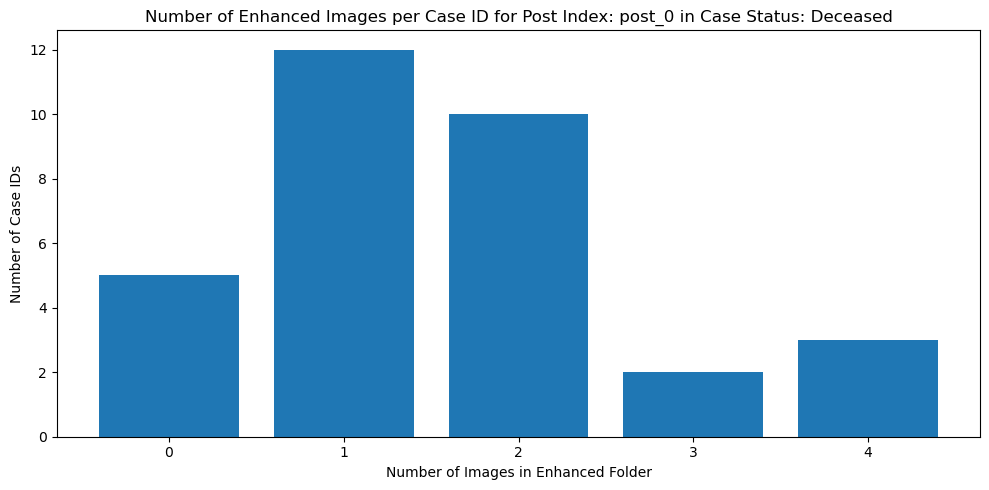

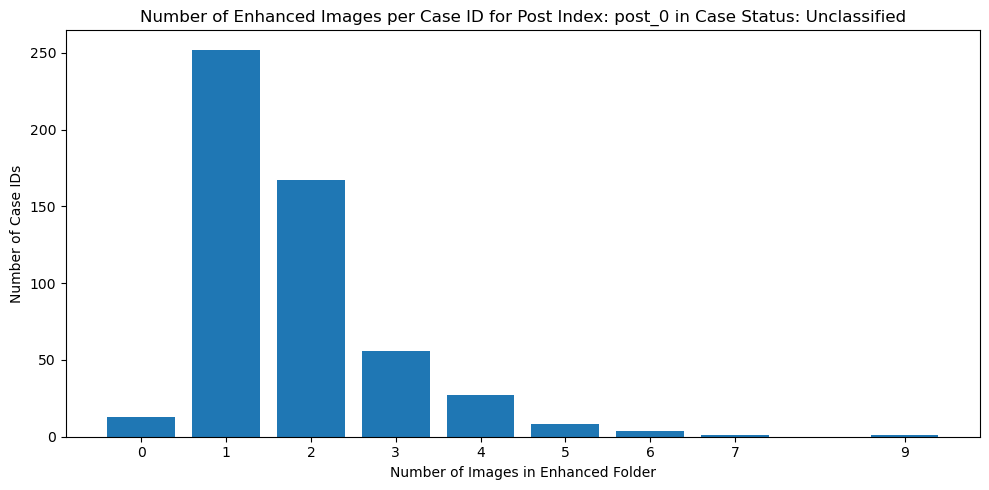

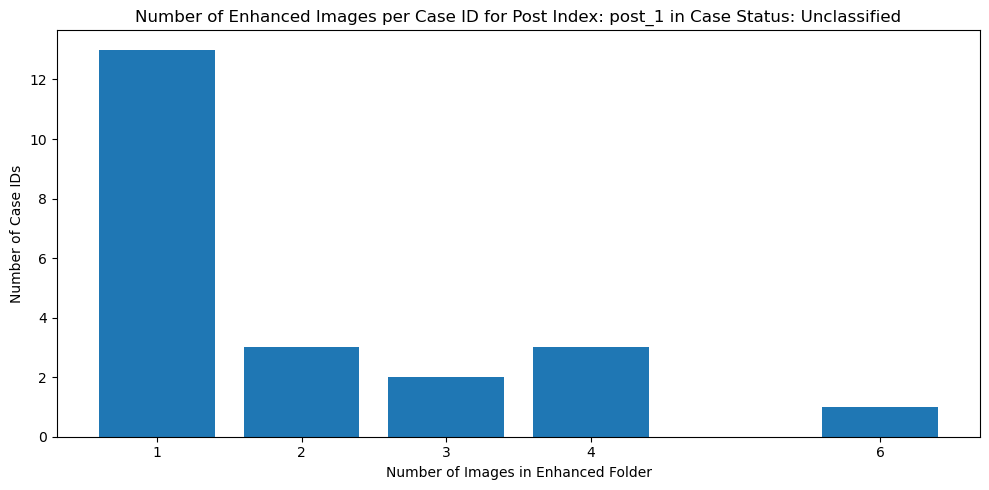

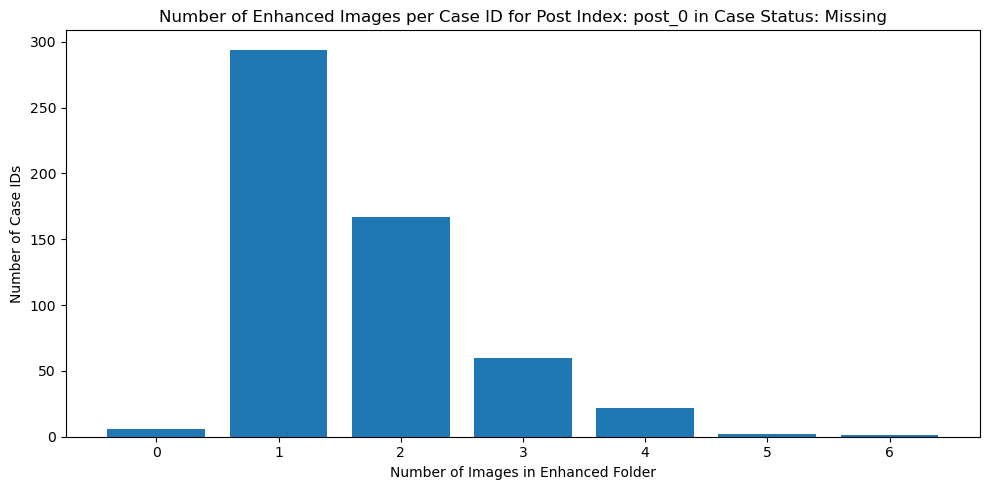

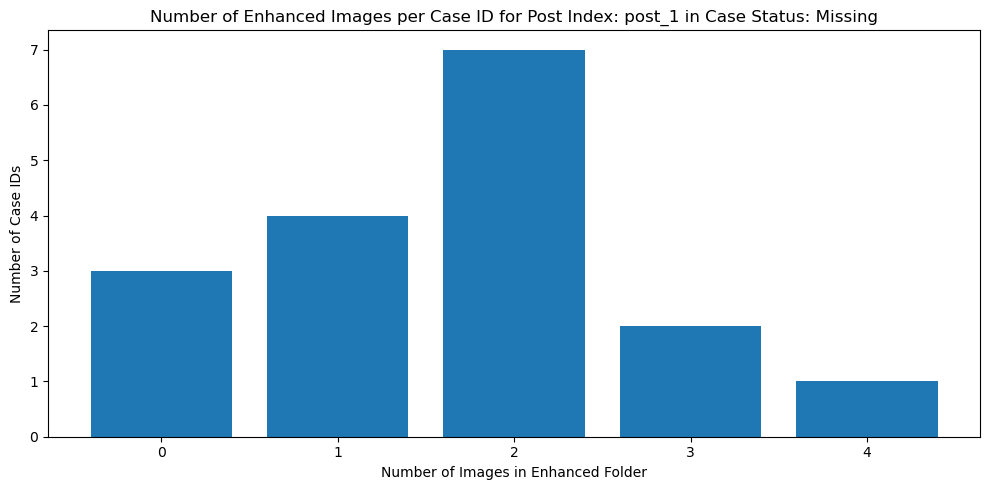

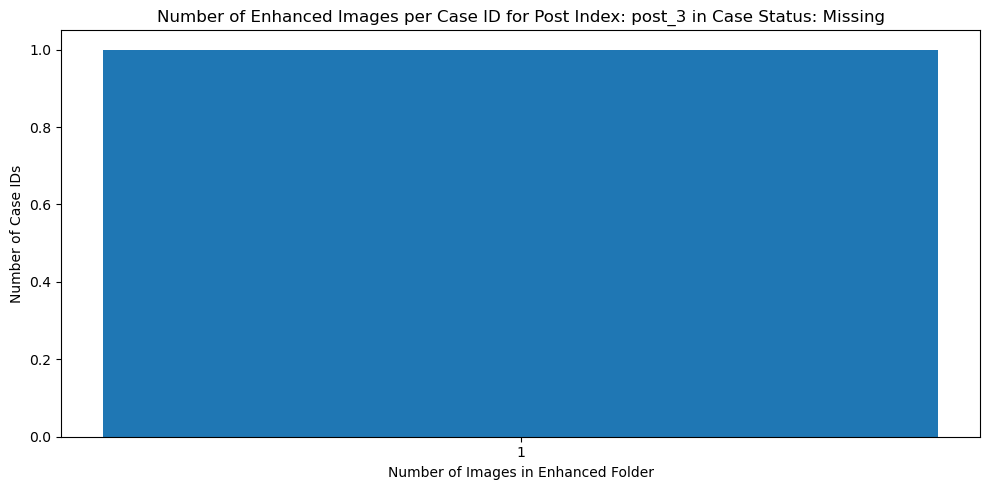

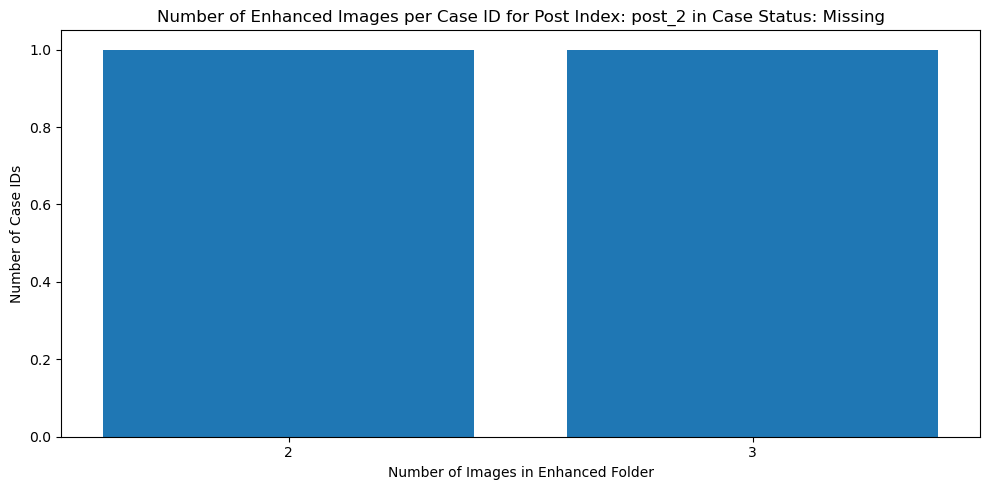

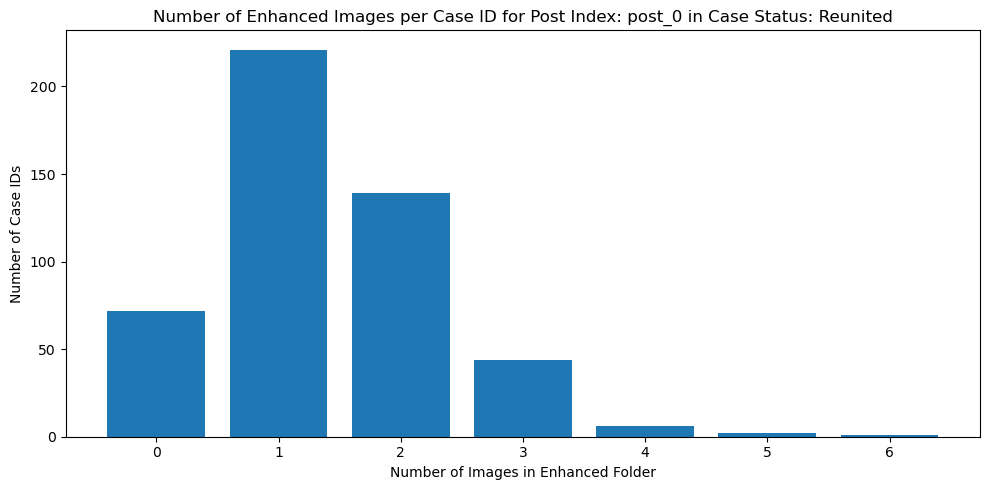

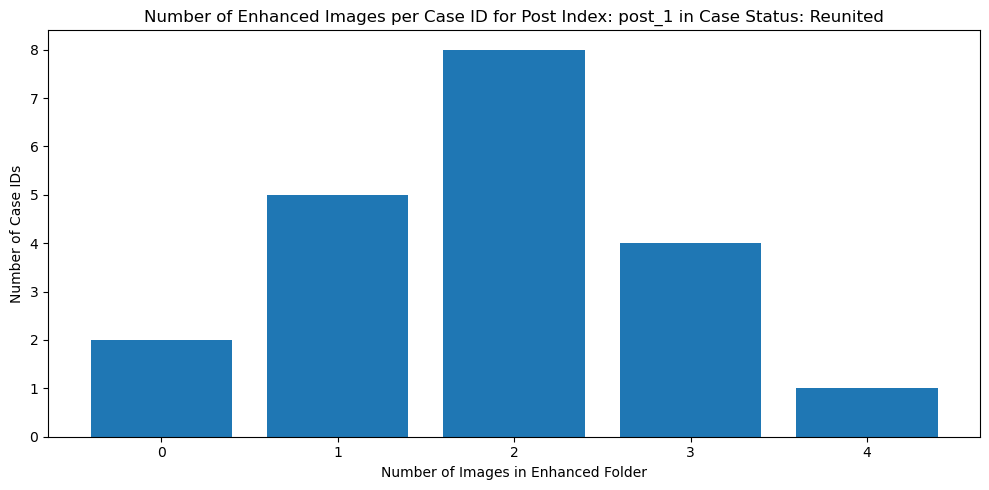

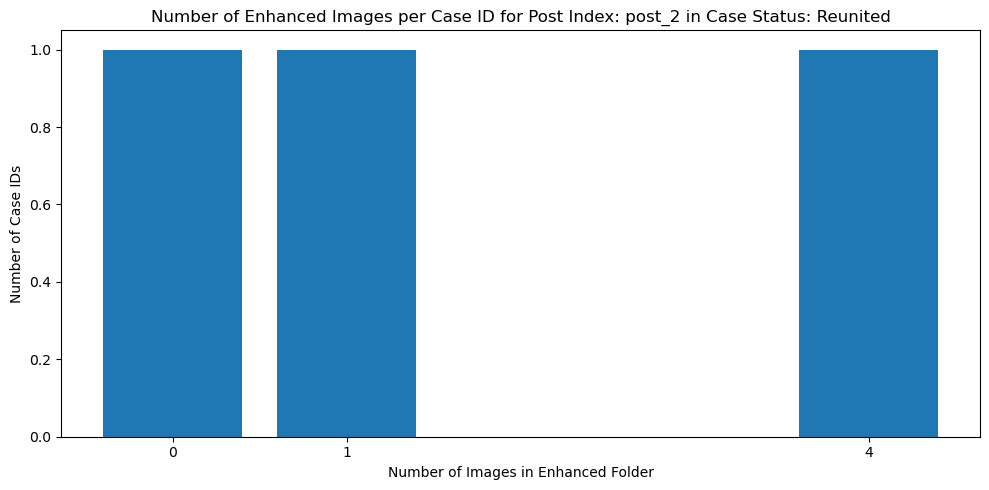

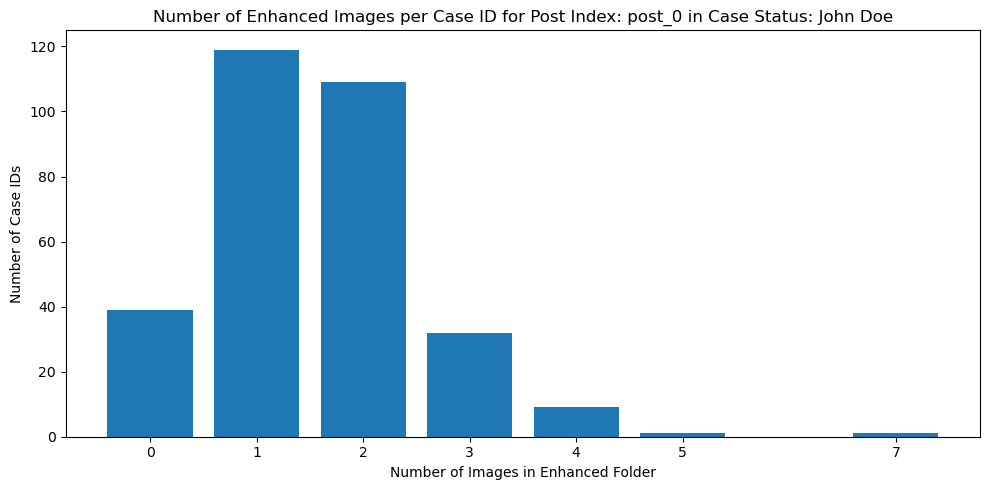

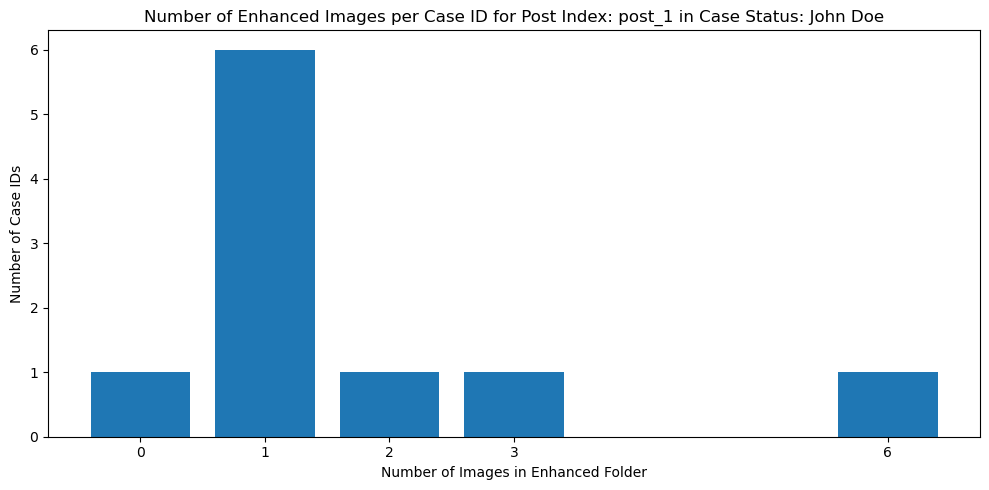

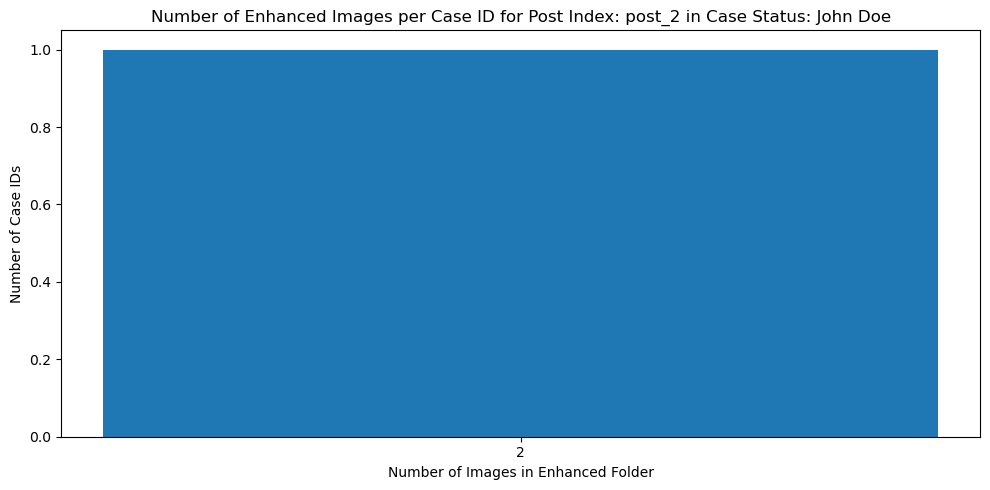

In [22]:
base_folder = "image_data"

# Iterate through each case status
for case_status in os.listdir(base_folder):
    case_status_path = os.path.join(base_folder, case_status)
    if os.path.isdir(case_status_path):
        post_index_counts = {}

        # Iterate through each case ID
        for case_id in os.listdir(case_status_path):
            case_id_path = os.path.join(case_status_path, case_id)
            if os.path.isdir(case_id_path):

                # Iterate through each post
                for post_index in os.listdir(case_id_path):
                    post_index_path = os.path.join(case_id_path, post_index)
                    enhanced_path = os.path.join(post_index_path, "enhanced")  # Modified to check the enhanced folder
                    if os.path.isdir(enhanced_path):
                        count = len([name for name in os.listdir(enhanced_path) if name.endswith('.png')])
                        post_index_counts.setdefault(post_index, []).append(count)

        # Plotting graph for each post index
        for post_index, counts in post_index_counts.items():
            count_freq = Counter(counts)

            plt.figure(figsize=(10, 5))
            plt.bar(count_freq.keys(), count_freq.values())
            plt.title(f'Number of Enhanced Images per Case ID for Post Index: {post_index} in Case Status: {case_status}')
            plt.xlabel('Number of Images in Enhanced Folder')
            plt.ylabel('Number of Case IDs')
            plt.xticks(list(count_freq.keys()))
            plt.tight_layout()
            plt.savefig(f'{case_status}_{post_index}_number_of_enhanced_images.png')
            plt.show()



The code is designed to navigate through a directory structure containing image data organized by case status and case ID. It counts the number of `.png` images in the "enhanced" subfolders for each post within each case. After counting, it generates bar graphs to visually represent the distribution of the number of enhanced images across different posts.



- **Bar Graphs**: A series of bar graphs will be created. Each graph corresponds to a different post index within a case status. The x-axis represents the number of enhanced images found in the "enhanced" folders, and the y-axis represents the frequency of case IDs with that number of images.


- The frequency distribution of the number of enhanced images in each case status and post index.
- Identification of any common patterns or anomalies, such as a particular number of images being more common or rare within the dataset.
- Understanding the data's structure regarding how many enhanced images are typically associated with each case.
